<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

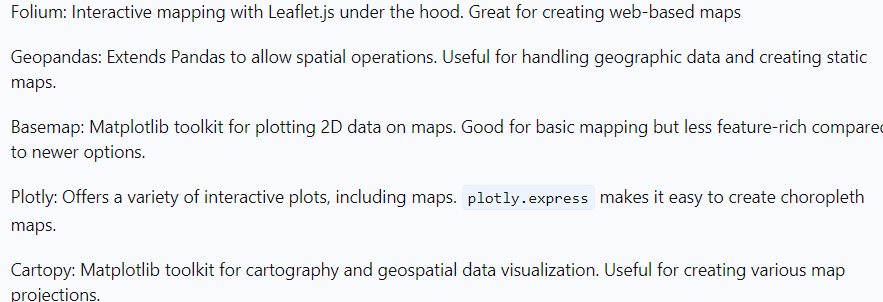

## Dataset Loading

In [262]:
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [263]:
df = pd.read_csv(Belga_0711_url)

In [264]:
df.sample(10)

,id,driver,datePH,longitude,latitude,altitude,gpsSpeed,timeStamp,calEngineLoad,vehSpeed,...,Altitude,Accuracy,Hour,Min,Sec,Feedno,Withpass,Withevent,Cumpass,Pass
18132,64aca7f5aac14162c0dafa82,Roly Belga,20230711,121.044557,14.563855,35,39,2023-07-11T00:51:47.000+0000,69,42,...,70.9,3.90,8.0,51.0,47.0,16692.0,1.0,2.0,33.0,0.0
16839,64aca2b131c1264f18051b44,Roly Belga,20230711,121.028000,14.548902,29,9,2023-07-11T00:30:39.000+0000,43,9,...,76.6,3.90,8.0,30.0,39.0,15409.0,1.0,2.0,35.0,0.0
2627,64ac6eeccc9b7f7afa07dc03,Roly Belga,20230711,121.028920,14.549683,26,0,2023-07-10T20:43:15.000+0000,37,0,...,68.2,3.90,4.0,43.0,15.0,3128.0,1.0,2.0,47.0,0.0
3341,64ac70591826d77f6377ef60,Roly Belga,20230711,121.046933,14.571437,37,9,2023-07-10T20:54:46.000+0000,42,9,...,70.7,3.90,4.0,54.0,46.0,3842.0,1.0,2.0,54.0,0.0
32481,64ace3e271a719347e8b9810,Roly Belga,20230711,121.045843,14.567570,27,8,2023-07-11T05:08:47.000+0000,52,7,...,58.8,15.00,13.0,8.0,47.0,30100.0,1.0,2.0,30.0,0.0
40325,64ad020f00c2135d398422f2,Roly Belga,20230711,121.029410,14.550653,32,18,2023-07-11T07:17:15.000+0000,89,24,...,78.8,8.52,15.0,17.0,15.0,37129.0,1.0,2.0,16.0,0.0
8672,64ac8425b8c3782b6bfff6e7,Roly Belga,20230711,121.046952,14.628313,51,0,2023-07-10T22:20:09.000+0000,40,0,...,83.3,3.90,6.0,20.0,9.0,8817.0,1.0,2.0,53.0,0.0
36186,64acf205ed819e496c1314d2,Roly Belga,20230711,120.985130,14.657082,34,11,2023-07-11T06:09:04.000+0000,40,11,...,63.4,9.90,14.0,9.0,4.0,33127.0,2.0,2.0,11.0,0.0
40697,64ad037000c2135d39842809,Roly Belga,20230711,121.008335,14.538602,24,0,2023-07-11T07:23:27.000+0000,36,1,...,53.2,7.30,15.0,23.0,27.0,37494.0,1.0,2.0,16.0,0.0
27227,64acca3c3c6ae81205c0dc3a,Roly Belga,20230711,120.998975,14.537717,23,20,2023-07-11T03:19:21.000+0000,0,22,...,62.3,3.90,11.0,19.0,21.0,25252.0,1.0,2.0,29.0,0.0


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   59962 non-null  object 
 1   driver               59962 non-null  object 
 2   datePH               59962 non-null  int64  
 3   longitude            59962 non-null  float64
 4   latitude             59962 non-null  float64
 5   altitude             59962 non-null  int64  
 6   gpsSpeed             59962 non-null  int64  
 7   timeStamp            59962 non-null  object 
 8   calEngineLoad        59962 non-null  int64  
 9   vehSpeed             59962 non-null  int64  
 10  throttlePosition     59962 non-null  int64  
 11  ambientAirTemp       59962 non-null  int64  
 12  engineOilTemp        59962 non-null  int64  
 13  Speed                59962 non-null  int64  
 14  fuelPressure         59962 non-null  int64  
 15  engineRPM            59962 non-null 

In [266]:
df.describe()

,datePH,longitude,latitude,altitude,gpsSpeed,calEngineLoad,vehSpeed,throttlePosition,ambientAirTemp,engineOilTemp,...,Altitude,Accuracy,Hour,Min,Sec,Feedno,Withpass,Withevent,Cumpass,Pass
count,59962.0,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,...,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000
mean,20230711.0,121.015852,14.582620,31.943781,12.439695,40.623378,13.531353,16.221574,31.234882,91.116074,...,68.544674,7.283566,11.684256,29.035984,29.508439,27089.408954,1.032799,1.976042,38.653255,0.000468
std,0.0,0.024735,0.054249,18.870216,16.248403,22.730954,16.755636,26.054464,2.799451,2.627240,...,18.453354,8.305447,4.872378,16.987965,17.326651,15347.426785,0.178113,0.152920,16.971604,0.154785
min,20230711.0,120.983452,14.507295,-157.000000,0.000000,0.000000,0.000000,0.000000,27.000000,86.000000,...,-168.810000,2.150000,4.000000,0.000000,0.000000,532.000000,1.000000,1.000000,7.000000,-1.000000
25%,20230711.0,120.991318,14.537463,18.000000,0.000000,31.000000,0.000000,0.000000,29.000000,89.000000,...,55.800000,3.900000,8.000000,15.000000,15.000000,13775.000000,1.000000,2.000000,26.000000,0.000000
50%,20230711.0,121.009363,14.564530,31.000000,0.000000,41.000000,4.000000,0.000000,31.000000,91.000000,...,65.500000,4.250000,12.000000,29.000000,30.000000,27057.000000,1.000000,2.000000,35.000000,0.000000
75%,20230711.0,121.039225,14.644352,46.000000,27.000000,51.000000,28.000000,30.000000,34.000000,93.000000,...,81.000000,9.030000,16.000000,44.000000,45.000000,40396.000000,1.000000,2.000000,53.000000,0.000000
max,20230711.0,121.059888,14.657928,120.000000,62.000000,100.000000,65.000000,100.000000,39.000000,100.000000,...,309.660000,335.900000,20.000000,59.000000,59.000000,53641.000000,2.000000,2.000000,85.000000,1.000000


In [267]:
df.isnull().sum()

,0
id,0
driver,0
datePH,0
longitude,0
latitude,0
altitude,0
gpsSpeed,0
timeStamp,0
calEngineLoad,0
vehSpeed,0


In [268]:
df.duplicated().sum()

0

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   59962 non-null  object 
 1   driver               59962 non-null  object 
 2   datePH               59962 non-null  int64  
 3   longitude            59962 non-null  float64
 4   latitude             59962 non-null  float64
 5   altitude             59962 non-null  int64  
 6   gpsSpeed             59962 non-null  int64  
 7   timeStamp            59962 non-null  object 
 8   calEngineLoad        59962 non-null  int64  
 9   vehSpeed             59962 non-null  int64  
 10  throttlePosition     59962 non-null  int64  
 11  ambientAirTemp       59962 non-null  int64  
 12  engineOilTemp        59962 non-null  int64  
 13  Speed                59962 non-null  int64  
 14  fuelPressure         59962 non-null  int64  
 15  engineRPM            59962 non-null 

In [270]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())

id
['64ac640d8311b05aa142074b' '64ac640d8311b05aa142074a'
 '64ac640b8311b05aa1420746' ... '64ad4cb286571b3fe57f55a6'
 '64ad4cb286571b3fe57f55a5' '64ad4cb286571b3fe57f55a4']
driver
['Roly Belga']
datePH
[20230711]
longitude
[120.98904   120.98889   120.988825  ... 120.9916666 120.9916683
 120.9917116]
latitude
[14.5079683 14.5079516 14.5079383 ... 14.5108599 14.5108633 14.5109583]
altitude
[ -18  -34  -40  -39  -38  -37  -36  -35  -33  -31  -30  -29  -28  -27
  -26  -25  -23  -12  -11  -10   -9   -8   -7   -6   -5   -4   -2   -1
    0    1    2    3    4    5    6   13   14   15    9   10   11   12
   16    7    8   19   18   20   21   22   17   23   25   27   28   30
   31   33   37   41   43   47   49   50   52   54   55   56   53   57
   51   48   46   42   40   38   35   32   29   26   24   36   34   39
   44   45   59   60   64   65   66   63   62   61   58   69   72   71
   70   67   68   94   73   74   75   76   77   78   79   80   82   83
   84   86   87   85   -3  103  105  106

In [271]:
df.drop(columns = ['id','driver', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',
                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',
                   'Speed', 'fuelPressure', 'engineRPM', 'engineOilTemp',
                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',
                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',
                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',
                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)

In [272]:
df.sample(10)

,datePH,longitude,latitude,timestamp,Board,Alight,Numpass,Time,Hour,Min,Sec
30929,20230711,120.998867,14.537428,2023-07-11 12:43:20,False,False,29.0,12:43:20,12.0,43.0,20.0
50423,20230711,121.033015,14.651218,2023-07-11 18:01:41,False,False,60.0,18:01:41,18.0,1.0,41.0
18634,20230711,121.056232,14.586127,2023-07-11 08:59:56,False,False,22.0,08:59:56,8.0,59.0,56.0
32296,20230711,121.044595,14.563883,2023-07-11 13:05:42,False,False,14.0,13:05:42,13.0,5.0,42.0
19163,20230711,121.055360,14.610443,2023-07-11 09:08:37,False,False,26.0,09:08:37,9.0,8.0,37.0
15422,20230711,120.991483,14.536667,2023-07-11 08:07:20,False,False,24.0,08:07:20,8.0,7.0,20.0
55921,20230711,121.055717,14.609202,2023-07-11 19:30:50,False,False,28.0,19:30:50,19.0,30.0,50.0
3596,20230711,121.056467,14.586433,2023-07-11 04:58:48,False,False,45.0,04:58:48,4.0,58.0,48.0
20277,20230711,121.039770,14.640968,2023-07-11 09:26:52,False,False,21.0,09:26:52,9.0,26.0,52.0
7055,20230711,120.997920,14.657067,2023-07-11 05:54:13,False,False,24.0,05:54:13,5.0,54.0,13.0


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datePH     59962 non-null  int64  
 1   longitude  59962 non-null  float64
 2   latitude   59962 non-null  float64
 3   timestamp  59958 non-null  object 
 4   Board      53385 non-null  object 
 5   Alight     53385 non-null  object 
 6   Numpass    53385 non-null  float64
 7   Time       53385 non-null  object 
 8   Hour       53385 non-null  float64
 9   Min        53385 non-null  float64
 10  Sec        53385 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.0+ MB


In [274]:
df.dropna(inplace = True)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datePH     53385 non-null  int64  
 1   longitude  53385 non-null  float64
 2   latitude   53385 non-null  float64
 3   timestamp  53385 non-null  object 
 4   Board      53385 non-null  object 
 5   Alight     53385 non-null  object 
 6   Numpass    53385 non-null  float64
 7   Time       53385 non-null  object 
 8   Hour       53385 non-null  float64
 9   Min        53385 non-null  float64
 10  Sec        53385 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 4.9+ MB


In [276]:
from sklearn.cluster import KMeans

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=21, random_state=42)  # Choose a reasonable number of clusters
df['stop_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])

In [277]:
df[df['Board']==True]

,datePH,longitude,latitude,timestamp,Board,Alight,Numpass,Time,Hour,Min,Sec,stop_cluster
18,20230711,120.988783,14.507963,2023-07-11 04:01:13,True,False,15.0,04:01:13,4.0,1.0,13.0,18
28,20230711,120.988768,14.507970,2023-07-11 04:01:22,True,False,16.0,04:01:22,4.0,1.0,22.0,18
312,20230711,120.990620,14.524773,2023-07-11 04:05:48,True,False,16.0,04:05:48,4.0,5.0,48.0,6
504,20230711,120.988995,14.535418,2023-07-11 04:08:44,True,False,16.0,04:08:44,4.0,8.0,44.0,19
524,20230711,120.988997,14.535923,2023-07-11 04:09:03,True,False,17.0,04:09:03,4.0,9.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
57421,20230711,121.028302,14.550112,2023-07-11 19:55:14,True,False,35.0,19:55:14,19.0,55.0,14.0,1
57422,20230711,121.028302,14.550112,2023-07-11 19:55:15,True,False,36.0,19:55:15,19.0,55.0,15.0,1
57427,20230711,121.028302,14.550112,2023-07-11 19:55:19,True,False,37.0,19:55:19,19.0,55.0,19.0,1
57433,20230711,121.028302,14.550112,2023-07-11 19:55:24,True,False,38.0,19:55:24,19.0,55.0,24.0,1


In [278]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datePH        53385 non-null  int64  
 1   longitude     53385 non-null  float64
 2   latitude      53385 non-null  float64
 3   timestamp     53385 non-null  object 
 4   Board         53385 non-null  int64  
 5   Alight        53385 non-null  int64  
 6   Numpass       53385 non-null  float64
 7   Time          53385 non-null  object 
 8   Hour          53385 non-null  float64
 9   Min           53385 non-null  float64
 10  Sec           53385 non-null  float64
 11  stop_cluster  53385 non-null  int32  
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 5.1+ MB


In [280]:
df.drop(columns = ['Time', 'datePH'], inplace = True)

In [281]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   longitude     53385 non-null  float64       
 1   latitude      53385 non-null  float64       
 2   timestamp     53385 non-null  datetime64[ns]
 3   Board         53385 non-null  int64         
 4   Alight        53385 non-null  int64         
 5   Numpass       53385 non-null  float64       
 6   Hour          53385 non-null  float64       
 7   Min           53385 non-null  float64       
 8   Sec           53385 non-null  float64       
 9   stop_cluster  53385 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2)
memory usage: 4.3 MB


In [283]:
def add_boarding_counts_per_cluster(data):
    """
    Adds a column 'WaitingPassengers' to the DataFrame, representing
    the number of passengers boarding at each stop_cluster during a specific hour.

    Parameters:
    - data: pandas DataFrame containing 'Hour', 'stop_cluster', 'Numpass', and 'Board'

    Returns:
    - Updated DataFrame with an additional column
    """
    # Filter only rows where passengers boarded
    boarded_data = data[data['Board'] == True]

    # Group by 'Hour' and 'stop_cluster', and count how many boarded at each cluster per hour
    boarding_counts = boarded_data.groupby(['Hour', 'stop_cluster'])['Board'].count().reset_index()
    boarding_counts.columns = ['Hour', 'stop_cluster', 'WaitingPassengers']

    # Merge the boarding counts back into the original DataFrame based on 'Hour' and 'stop_cluster'
    data = pd.merge(data, boarding_counts, on=['Hour', 'stop_cluster'], how='left')

    # Fill NaN values with 0 (for rows where no boarding occurred at the cluster)
    data['WaitingPassengers'] = data['WaitingPassengers'].fillna(0).astype(int)

    return data

In [284]:
df = add_boarding_counts_per_cluster(df)

In [285]:
def update_waiting_passengers_cumulatively(data):
    """
    Updates the 'WaitingPassengers' cumulatively by subtracting one from the waiting passengers
    in the cluster if a boarding action occurs (Board == True).

    Parameters:
    - data: pandas DataFrame containing 'Board' and 'WaitingPassengers'

    Returns:
    - Updated DataFrame with adjusted waiting passenger counts cumulatively
    """
    # Create a copy of the boarding count for adjustment
    data['waiting_passengers_after_boarding'] = data['WaitingPassengers'].copy()

    # Group the data by 'stop_cluster' and 'Hour' to track cumulative boarding
    grouped = data.groupby(['stop_cluster', 'Hour'])

    for (cluster, hour), group in grouped:
        # Cumulative adjustment within the group for the same cluster and hour
        waiting_passengers = group['WaitingPassengers'].max()  # Start with max waiting passengers

        for idx in group.index:
            if data.at[idx, 'Board']:
                # Subtract one passenger for each boarding, but ensure non-negative count
                waiting_passengers = max(waiting_passengers - 1, 0)

            # Update the waiting passenger count
            data.at[idx, 'waiting_passengers_after_boarding'] = waiting_passengers

    return data

In [286]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)
df.drop(columns = ['WaitingPassengers'], inplace = True)
df.rename(columns = {'waiting_passengers_after_boarding': 'WaitingPassengers'}, inplace = True)

In [287]:
df[df['Board'] == 1]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,WaitingPassengers
18,120.988783,14.507963,2023-07-11 04:01:13,1,0,15.0,4.0,1.0,13.0,18,1
28,120.988768,14.507970,2023-07-11 04:01:22,1,0,16.0,4.0,1.0,22.0,18,0
312,120.990620,14.524773,2023-07-11 04:05:48,1,0,16.0,4.0,5.0,48.0,6,0
504,120.988995,14.535418,2023-07-11 04:08:44,1,0,16.0,4.0,8.0,44.0,19,0
524,120.988997,14.535923,2023-07-11 04:09:03,1,0,17.0,4.0,9.0,3.0,3,17
...,...,...,...,...,...,...,...,...,...,...,...
51032,121.028302,14.550112,2023-07-11 19:55:14,1,0,35.0,19.0,55.0,14.0,1,3
51033,121.028302,14.550112,2023-07-11 19:55:15,1,0,36.0,19.0,55.0,15.0,1,2
51035,121.028302,14.550112,2023-07-11 19:55:19,1,0,37.0,19.0,55.0,19.0,1,1
51037,121.028302,14.550112,2023-07-11 19:55:24,1,0,38.0,19.0,55.0,24.0,1,0


In [288]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [289]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,WaitingPassengers,Day_of_week
48629,121.039035,14.641557,2023-07-11 19:10:35,0,0,27.0,19.0,10.0,35.0,16,0,1
30114,121.049480,14.575052,2023-07-11 13:14:29,0,0,14.0,13.0,14.0,29.0,5,0,1
32795,120.986560,14.657287,2023-07-11 14:02:40,0,0,0.0,14.0,2.0,40.0,0,19,1
40942,120.991518,14.536553,2023-07-11 16:53:00,0,0,13.0,16.0,53.0,0.0,3,2,1
34523,121.029197,14.655620,2023-07-11 14:37:31,0,0,29.0,14.0,37.0,31.0,10,0,1
7337,121.019698,14.657612,2023-07-11 06:04:42,0,0,45.0,6.0,4.0,42.0,4,14,1
32169,121.012082,14.657772,2023-07-11 13:52:39,0,0,27.0,13.0,52.0,39.0,14,0,1
28103,120.998592,14.537597,2023-07-11 12:41:26,0,0,29.0,12.0,41.0,26.0,15,6,1
39591,120.991323,14.508878,2023-07-11 16:31:11,0,0,12.0,16.0,31.0,11.0,18,1,1
42126,121.028322,14.549178,2023-07-11 17:12:40,0,0,13.0,17.0,12.0,40.0,1,17,1


In [294]:
belga_0711 = df.copy()

## Model training

In [290]:
X = df[['Hour', 'Day_of_week', 'longitude', 'latitude', 'stop_cluster']]
y = df['WaitingPassengers']  # If manually estimated or modeled

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [291]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [292]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [293]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
xg_model.score(X_test, y_test)

Random Forest RMSE: 1.3589888552443663
XGBoost RMSE: 1.5954582606388705
0.9499181170147892


0.9309728741645813

## Model Testing